In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib
import h5py
np.set_printoptions(2)

In [2]:
def get_property(mat,energy):
    url = "http://henke.lbl.gov/cgi-bin/pert_cgi.pl"
    data = {'Element':str(mat), 'Energy':str(energy), 'submit':'Submit Query'}
    data = urllib.parse.urlencode(data)
    data = data.encode('utf-8')
    req = urllib.request.Request(url, data)
    resp = urllib.request.urlopen(req)
    respDat = resp.read()
    response = respDat.split()
    d =  b'g/cm^3<li>Delta'
    i = response.index(d)
    delta = str(response[i+2])[:str(response[i+2]).index('<li>Beta')][2:]
    beta = str(response[i+4])[2:-1]
    return float(delta),float(beta)

In [3]:
π = np.pi
E = 10000
λ = (1239.84/E)*1e-9
k = ((2*π)/λ)
A = -1j/(2*k)
n_au = 1 - get_property('Au',E)[0] - 1j*get_property('Au',E)[1]

In [4]:
dim_x = 5000
dim_z = 5000
z = np.linspace(-2e-6,5e-6,dim_z)
x = np.linspace(0,1000e-6,dim_x)
Δx = x[1] - x[0]
Δz = z[1] - z[0]
X,Z = np.meshgrid(x,z)
r_z = A * (Δx/(Δz)**2) 
coords = [x[0]*1e6,x[-1]*1e6,z[0]*1e6,z[-1]*1e6]

In [5]:
c = -2e-6
m = np.tan(4e-3)
loc_mat = np.where(Z<(m*X+c)) #location of material.

In [6]:
F = np.zeros(np.shape(X),dtype=np.complex128)
F[loc_mat] = -1j*(k/2)*(n_au**2-1)

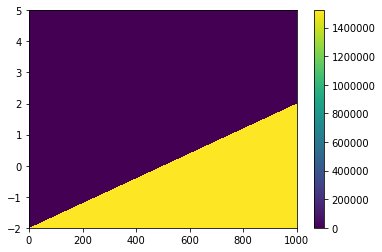

In [7]:
plt.imshow(np.abs(F),origin='lower',aspect='auto',extent=coords)
plt.colorbar()
plt.show()

In [8]:
f = open("refractive_index.dat", "w")

#Header
f.write('1211216'+'\n') #MAT_FILE_CLASSID
f.write(str(dim_x)+'\n')
f.write(str(dim_z)+'\n')
f.write(str(-1)+'\n')

#Content
for i in range(dim_x):
    for j in range(dim_z):
        f.write(str(np.real(F[i][j]))+'\n')
        f.write(str(np.angle(F[i][j]))+'\n')
#Close
f.close()